In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

In [2]:
moran_df = pd.read_csv('data/All_MoranI_combined.csv')
pathway_df = pd.read_csv('Task_Info_with_CRC_binary.csv')
moran_df = moran_df.merge(pathway_df[['Task', 'System' ,'Subsystem']], on='Task', how='left')
moran_df.rename(columns={'System':'Top-level Pathway','Subsystem': 'Detailed Pathway'}, inplace=True)
moran_df

,Task,I,pval_norm,var_norm,pval_norm_fdr_bh,Subject_ID,Treatment_Status,Optimal_k,I_z,Top-level Pathway,Detailed Pathway
0,Vesicle secretion,0.124935,1.749904e-08,0.000529,8.749521e-07,1182412B,Treated,6,3.037548,Vesicle trafficking,Vesicle secretion
1,Trafficking to endosomes (Clathrin Vesicles),0.124935,1.749904e-08,0.000529,8.749521e-07,1182412B,Treated,6,3.037548,Vesicle trafficking,Endosomal trafficking
2,Elaidate degradation,0.088321,4.391588e-05,0.000529,5.953001e-04,1182412B,Treated,6,1.669880,LIPIDS METABOLISM,FATTY ACID METABOLISM
3,Palmitate degradation,0.088321,4.391588e-05,0.000529,5.953001e-04,1182412B,Treated,6,1.669880,LIPIDS METABOLISM,FATTY ACID METABOLISM
4,Linolenate degradation,0.087585,5.012796e-05,0.000529,5.953001e-04,1182412B,Treated,6,1.642407,LIPIDS METABOLISM,FATTY ACID METABOLISM
...,...,...,...,...,...,...,...,...,...,...,...
2194,Synthesis of estradiol-17beta (E2) from andros...,0.024255,2.028072e-03,0.000073,2.112575e-03,120161,Untreated,6,-1.635369,HORMONES METABOLISM,ESTROGEN METABOLISM
2195,Synthesis of estrone (E1) from androstenedione,0.014400,4.290782e-02,0.000073,4.423486e-02,120161,Untreated,6,-1.683341,HORMONES METABOLISM,ESTROGEN METABOLISM
2196,Keratan sulfate biosynthesis from O-glycan (co...,0.005509,2.497815e-01,0.000073,2.497815e-01,120161,Untreated,6,-1.726617,GLYCAN METABOLISM,KERATAN SULFATE METABOLISM
2197,Keratan sulfate biosynthesis from O-glycan (co...,0.005509,2.497815e-01,0.000073,2.497815e-01,120161,Untreated,6,-1.726617,GLYCAN METABOLISM,KERATAN SULFATE METABOLISM


In [3]:
moran_df.columns

Index(['Task', 'I', 'pval_norm', 'var_norm', 'pval_norm_fdr_bh', 'Subject_ID',
       'Treatment_Status', 'Optimal_k', 'I_z', 'Top-level Pathway',
       'Detailed Pathway'],
      dtype='object')

In [11]:
# Noramlize Moran's I to get I_z
# moran_df["I_z"] = moran_df.groupby("Subject_ID")["I"].transform(
#     lambda x: (x - x.mean()) / x.std(ddof=0)
# )

In [12]:
moran_df["I_z"] = moran_df.groupby("Subject_ID")["I"].transform(
    lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1
)

### Mean Moran's I Normalized Analysis

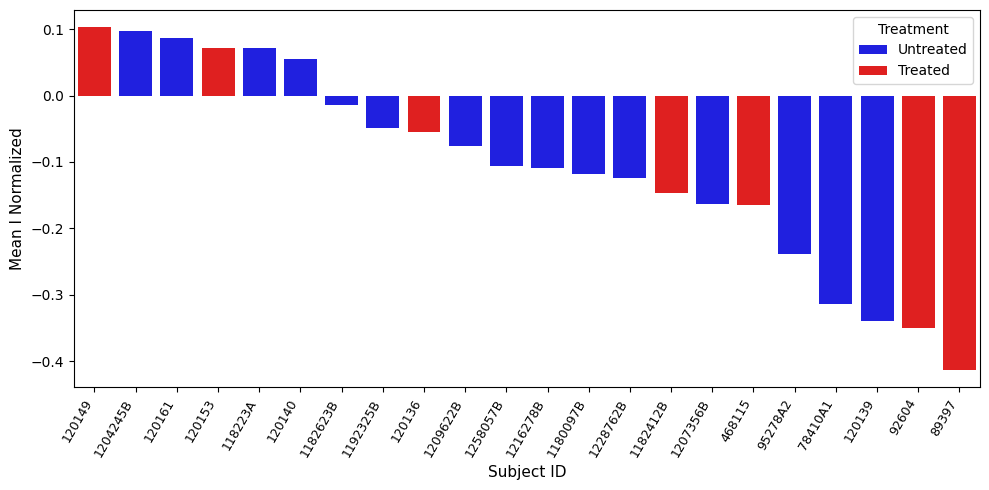

In [13]:
df_subject = (
    moran_df.groupby(["Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

order = (
    df_subject.groupby("Subject_ID")["I_z"]
    .mean()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Subject_ID",
    y="I_z",
    hue="Treatment_Status",
    data=df_subject,
    order=order,
    palette={"Treated": "red", "Untreated": "blue"}
)

plt.xticks(rotation=60, ha="right", fontsize=9)
plt.ylabel("Mean I Normalized", fontsize=11)
plt.xlabel("Subject ID", fontsize=11)
# plt.title("Average Moran’s I per Subject (Treated vs Untreated)", fontsize=13, pad=10)
plt.legend(title="Treatment", loc="upper right")
plt.tight_layout()
plt.show()

### Box-Plot 

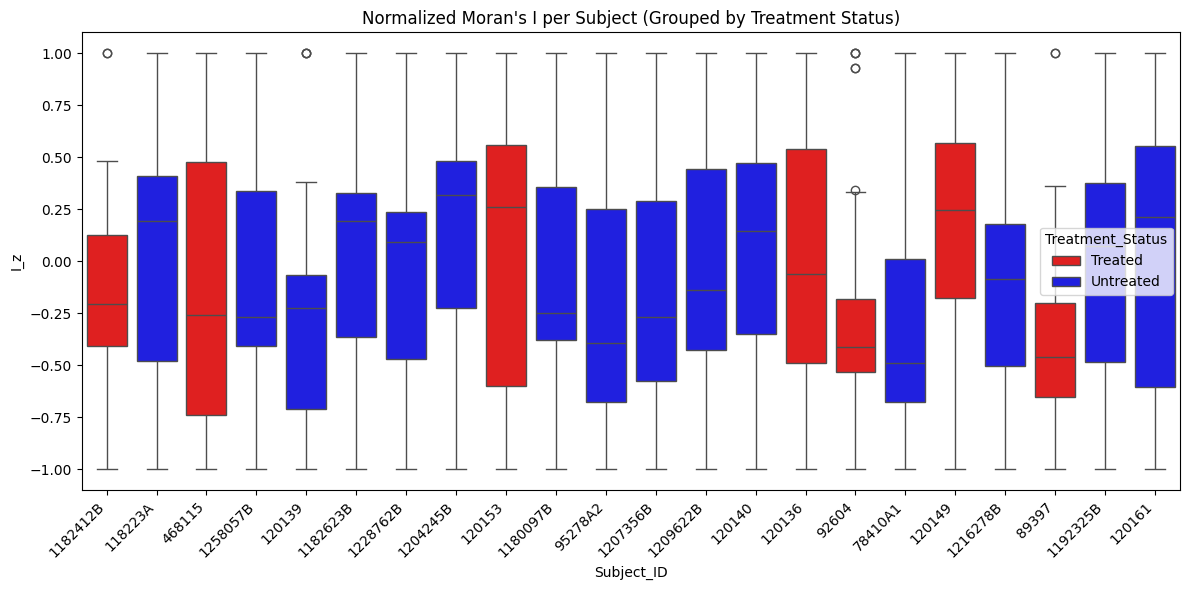

In [9]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=moran_df,
    x="Subject_ID",
    y="I_z",
    hue="Treatment_Status",
    palette={"Untreated": "blue", "Treated": "red"}
)

plt.xticks(rotation=45, ha='right')
plt.title("Normalized Moran's I per Subject (Grouped by Treatment Status)")
plt.tight_layout()
plt.show()


In [10]:
top_moran = moran_df[moran_df['I'].abs() >= 0.5].dropna().sort_values(by='I', ascending=False)
top_moran

,Task,I,pval_norm,var_norm,pval_norm_fdr_bh,Subject_ID,Treatment_Status,Optimal_k,I_z,Top-level Pathway,Detailed Pathway
2099,Elaidate synthesis,0.658385,0.0,0.000073,0.0,120161,Untreated,6,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
2100,Palmitate synthesis,0.658385,0.0,0.000073,0.0,120161,Untreated,6,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
2101,cis-vaccenic acid synthesis,0.658385,0.0,0.000073,0.0,120161,Untreated,6,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
2102,ATP regeneration from glucose (normoxic condit...,0.653981,0.0,0.000073,0.0,120161,Untreated,6,0.986508,ENERGY METABOLISM,ATP GENERATION
2104,Taurochenodeoxycholate synthesis,0.643006,0.0,0.000073,0.0,120161,Untreated,6,0.952888,LIPIDS METABOLISM,BILE ACID SYNTHESIS
...,...,...,...,...,...,...,...,...,...,...,...
2005,Glucose to lactate conversion,0.501763,0.0,0.000023,0.0,1192325B,Untreated,6,0.788821,CARBOHYDRATES METABOLISM,PYRUVATE METABOLISM
2004,Gluconeogenesis from Lactate,0.501763,0.0,0.000023,0.0,1192325B,Untreated,6,0.788821,CARBOHYDRATES METABOLISM,GLUCONEOGENESIS
1501,Synthesis of L-kynurenine from tryptophan,0.501574,0.0,0.000031,0.0,92604,Treated,7,1.000000,AMINO ACIDS METABOLISM,TRYPTOPHAN METABOLISM
1500,Synthesis of kynate from tryptophan,0.501574,0.0,0.000031,0.0,92604,Treated,7,1.000000,AMINO ACIDS METABOLISM,TRYPTOPHAN METABOLISM


### LogFC Analysis

/tmp/ipykernel_706553/3629193487.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


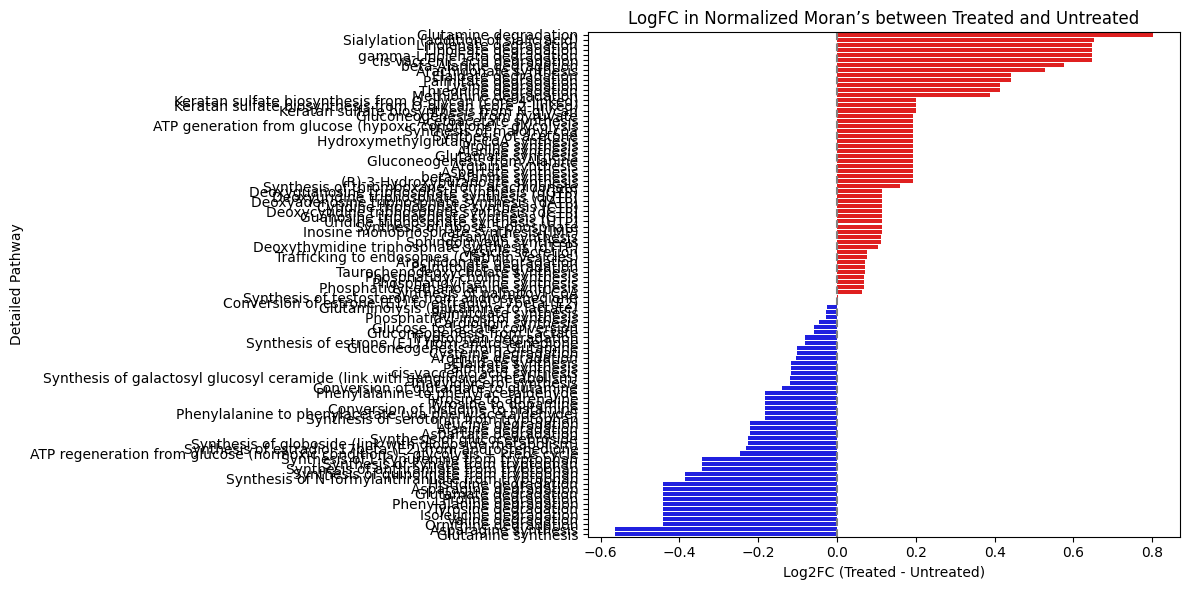

100

In [22]:
moran_df["I_abs"] = moran_df["I_z"].abs()

# Task, Top-level Pathway, Detailed Pathway

task_stats = (
    moran_df.groupby(["Task", "Treatment_Status"])["I_abs"]
    .mean()
    .reset_index()
    .pivot(index="Task", columns="Treatment_Status", values="I_abs")
)

eps = 1e-6
task_stats["logFC"] = np.log2((task_stats["Treated"] + eps) / (task_stats["Untreated"] + eps))

task_stats = task_stats.dropna(subset=["Treated", "Untreated"])

task_stats = task_stats.sort_values("logFC", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="logFC",
    y=task_stats.index, 
    data=task_stats, 
    palette=["red" if x > 0 else "blue" for x in task_stats["logFC"]]
)
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Log2FC (Treated - Untreated)")
plt.ylabel("Detailed Pathway")
plt.title("LogFC in Normalized Moran’s between Treated and Untreated")
plt.tight_layout()
plt.show()

len(task_stats.index)


/tmp/ipykernel_706553/989414175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


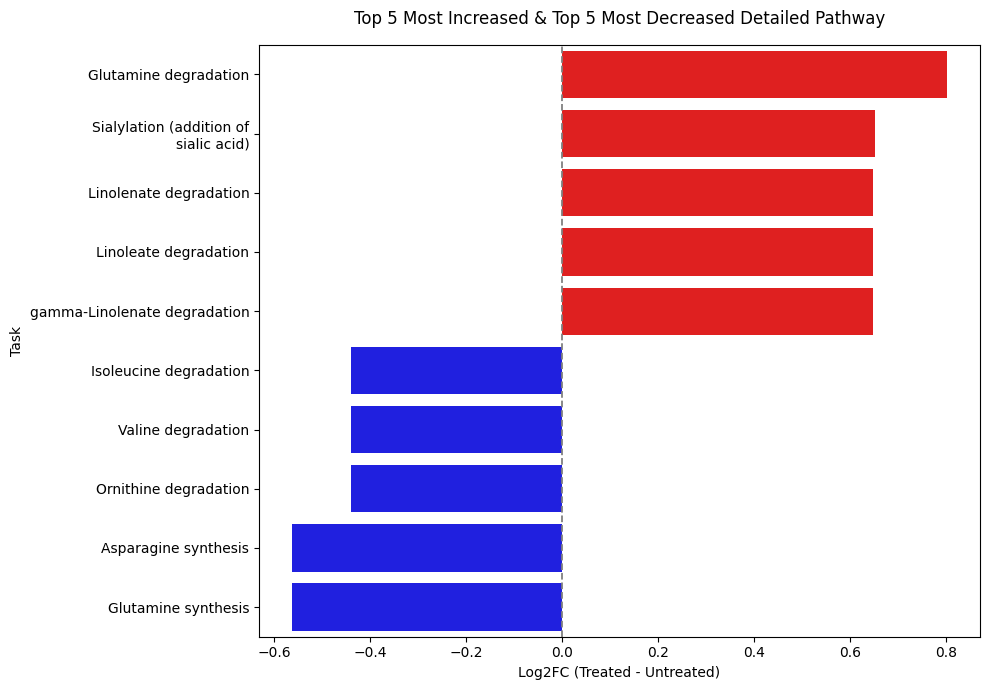

In [23]:
top5_up = task_stats.head(5)
top5_down = task_stats.tail(5)

top10 = pd.concat([top5_up, top5_down])

clean_labels = [
    "\n".join(textwrap.wrap(label, width=30))
    for label in top10.index
]

colors = ["red" if x > 0 else "blue" for x in top10["logFC"]]

plt.figure(figsize=(10, 7))

sns.barplot(
    x=top10["logFC"],
    y=clean_labels,
    palette=colors
)

plt.axvline(0, color="gray", linestyle="--", lw=1.3)
plt.xlabel("Log2FC (Treated - Untreated)")
plt.ylabel("Task")
plt.title("Top 5 Most Increased & Top 5 Most Decreased Detailed Pathway", pad=15)
plt.tight_layout()
plt.show()

### Heatmap Analysis

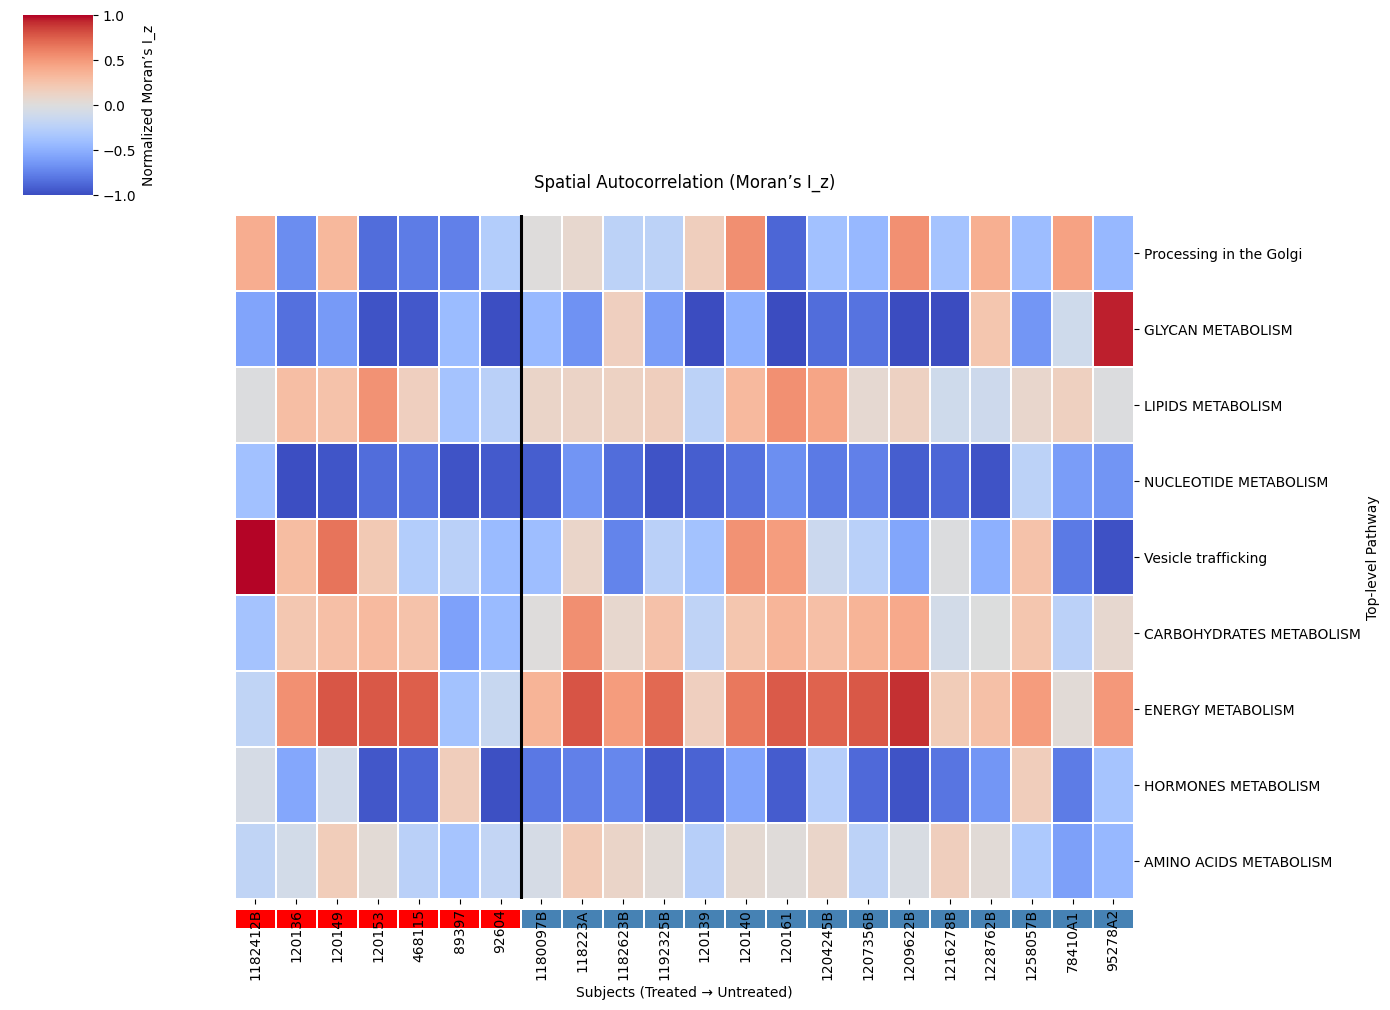

In [16]:
###### Top-level Pathway level Heatmap Analysis ############
heat_df = (
    moran_df.groupby(["Top-level Pathway", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Top-level Pathway",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

task_stats = (
    moran_df.groupby(["Top-level Pathway", "Treatment_Status"])["I_abs"]
    .mean()
    .reset_index()
    .pivot(index="Top-level Pathway", columns="Treatment_Status", values="I_abs")
)

eps = 1e-6
task_stats["logFC"] = np.log2((task_stats["Treated"] + eps) / (task_stats["Untreated"] + eps))

task_stats = task_stats.dropna(subset=["Treated", "Untreated"])

ordered_pathways = task_stats.sort_values("logFC", ascending=False).index
heat_pivot = heat_pivot.loc[ordered_pathways]

treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]
heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

new_labels = [col[1] for col in list(heat_pivot.columns)]
heat_pivot.columns = new_labels

g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

treated_count = len(treated_cols)
g.ax_heatmap.axvline(
    treated_count,
    color="black",
    lw=2.2,
    linestyle="-"
)

if g.ax_col_dendrogram.get_legend():
    g.ax_col_dendrogram.get_legend().remove()

g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Top-level Pathway")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z)", pad=20)

plt.show()


In [17]:
###### Detailed Pathway level Heatmap Analysis ############
heat_df = (
    moran_df.groupby(["Detailed Pathway", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Detailed Pathway",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

ordered_pathways = task_stats.sort_values("logFC", ascending=False).index
heat_pivot = heat_pivot.loc[ordered_pathways]

treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]
heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

new_labels = [col[1] for col in list(heat_pivot.columns)]
heat_pivot.columns = new_labels

g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

treated_count = len(treated_cols)
g.ax_heatmap.axvline(
    treated_count,
    color="black",
    lw=2.2,
    linestyle="-"
)

if g.ax_col_dendrogram.get_legend():
    g.ax_col_dendrogram.get_legend().remove()

g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Detailed Pathway")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z)", pad=20)

plt.show()


KeyError: "None of [Index(['Processing in the Golgi', 'GLYCAN METABOLISM', 'LIPIDS METABOLISM',\n       'NUCLEOTIDE METABOLISM', 'Vesicle trafficking',\n       'CARBOHYDRATES METABOLISM', 'ENERGY METABOLISM', 'HORMONES METABOLISM',\n       'AMINO ACIDS METABOLISM'],\n      dtype='object', name='Top-level Pathway')] are in the [index]"

/home/sadegh/python_projects/nanostring-cosmx-spatial-omics-modeling/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


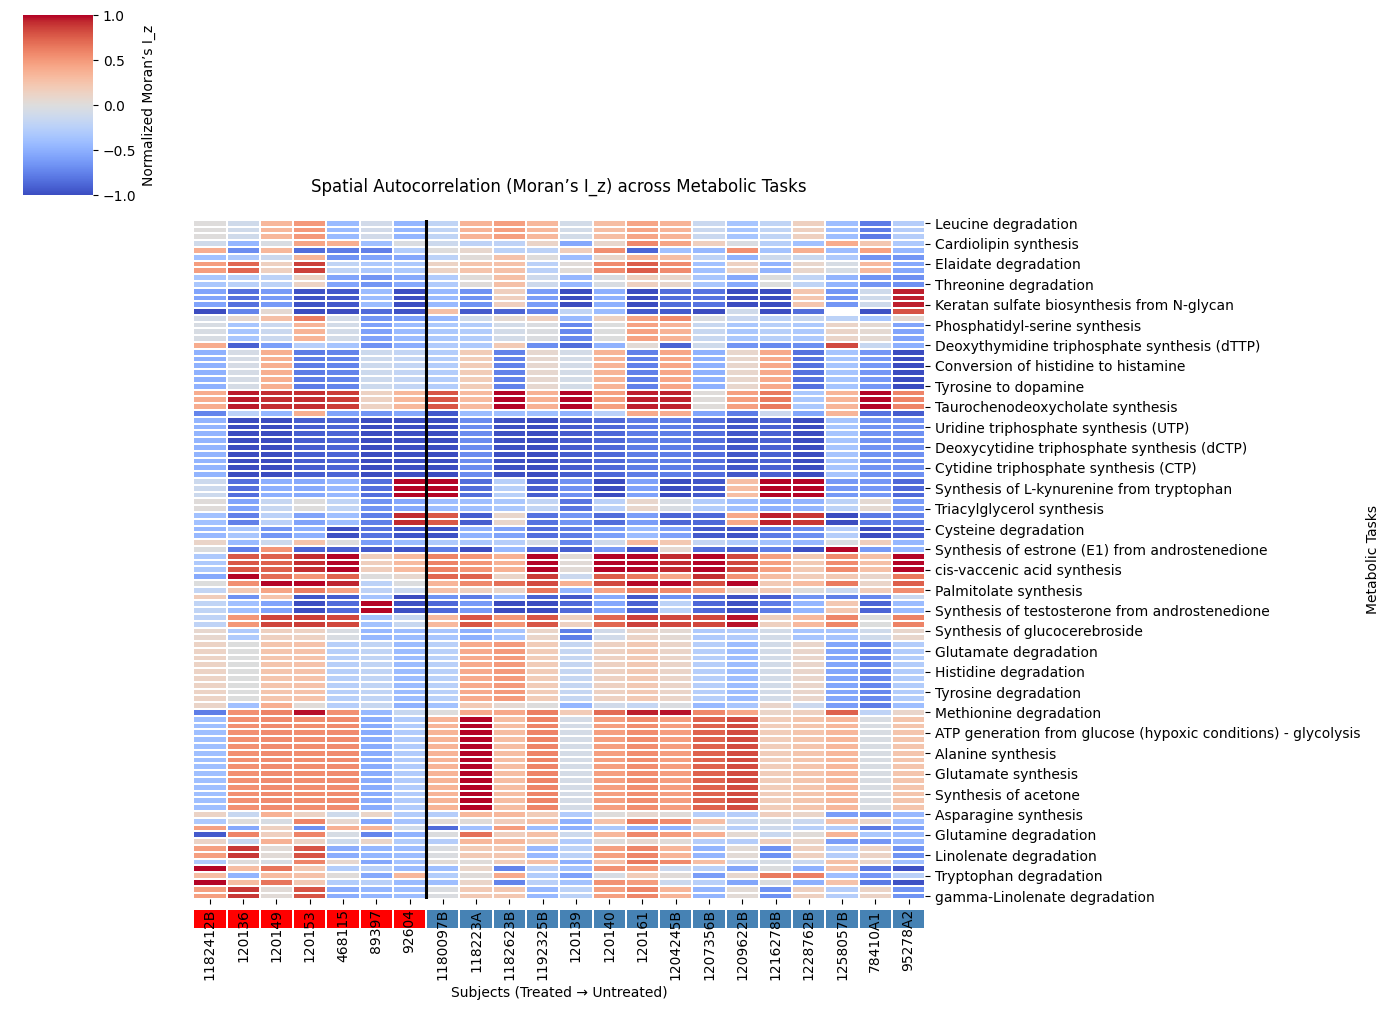

In [18]:
###### Task level Heatmap Analysis ############
task_order = (
    moran_df.groupby(["Task", "Treatment_Status"])["I_z"]
    .mean()
    .unstack()
)

# Handle missing values
task_order = task_order.dropna(subset=["Treated", "Untreated"])

# Step 2: compute logFC safely
eps = 1e-6
task_order["logFC"] = np.log2((task_order["Treated"] + eps) / (task_order["Untreated"] + eps))

# Step 3: order tasks by logFC
ordered_tasks = task_order.sort_values("logFC", ascending=False).index

# Step 4: build heatmap matrix (I_z values across subjects)
heat_df = (
    moran_df.groupby(["Task", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Task",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

# Keep tasks in desired order
heat_pivot = heat_pivot.loc[ordered_tasks.intersection(heat_pivot.index)]

# Separate Treated/Untreated columns
treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]

heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

# Column colors
treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

# Rename columns to show only subject IDs
heat_pivot.columns = [col[1] for col in heat_pivot.columns]

# Draw heatmap
g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

# Move the color bar
col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

# Draw vertical line between Treated and Untreated
g.ax_heatmap.axvline(
    len(treated_cols),
    color="black",
    lw=2.2,
    linestyle="-"
)

# Labels
g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Metabolic Tasks")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z) across Metabolic Tasks", pad=20)

plt.show()
